# Cooke triplet


screenshot from wikipedia:

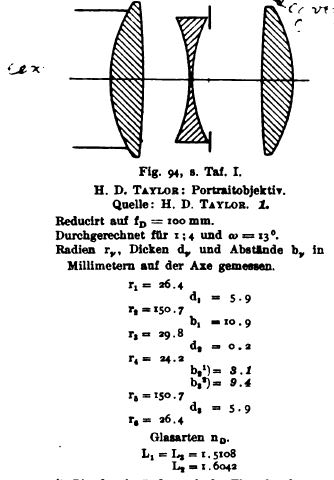


In [ ]:
import torch
import torchlensmaker as tlm

d1, d2 = 30, 25

r1 = tlm.Sphere(d1, 26.4)
r2 = tlm.Sphere(d1, -150.7)
r3 = tlm.Sphere(d2, -29.8)
r4 = tlm.Sphere(d2, 24.2)
r5 = tlm.Sphere(d1, 150.7)
r6 = tlm.Sphere(d1, -26.4)

material1 = tlm.NonDispersiveMaterial(1.5108)
material2 = tlm.NonDispersiveMaterial(1.6042)

L1 = tlm.Lens(r1, r2, material=material1, inner_thickness=5.9)
L2 = tlm.Lens(r3, r4, material=material2, inner_thickness=0.2)
L3 = tlm.Lens(r5, r6, material=material1, inner_thickness=5.9)

focal = tlm.parameter(85)

optics = tlm.Sequential(
    tlm.ObjectAtInfinity(20, 30),
    L1,
    tlm.Gap(10.9),
    L2,
    tlm.Gap(3.1),
    tlm.Aperture(18),
    tlm.Gap(9.4),
    L3,
    tlm.Gap(focal),
    tlm.ImagePlane(50),
)

tlm.show(optics, dim=2)

In [ ]:
import torch.optim as optim

tlm.optimize(optics,
             dim=2,
             optimizer = optim.Adam(optics.parameters(), lr=1e-1),
             sampling = {"base": 5, "object": 10, "wavelength": 3},
             num_iter=100,
).plot()

In [ ]:
tlm.show(optics, dim=2)

In [ ]:
f, _ = tlm.spot_diagram(optics, {"base":1000, "object": 4}, row="object", figsize=(12, 12))